In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc

In [2]:
get_ipython().magic('matplotlib inline')
sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
#import raw data
df = pd.read_csv('adult.csv')

# Data Preparation and Cleansing

In [4]:
#no NaN in the raw data
print('isna().sum():')
print(df.isna().sum())
#check shape of data frame
df.shape

isna().sum():
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


(48842, 15)

In [5]:
#2799 rows ? in workclass
dff = df[df.workclass == '?']
print(dff.shape)
#if workclass is ?, occupation is ?
dff['workclass'].equals(dff['occupation'])

(2799, 15)


True

In [6]:
#2809 rows ? in occupation
dfc = df[df.occupation == '?']
print(dfc.shape)
#people has occupation = ? not neccessary to be ? in workclass
#some ? will have workclass as Never-worked
dfc['occupation'].equals(dfc['workclass'])
ll = pd.DataFrame()
ll['ss'] = np.where(dfc['occupation']!=dfc['workclass'],dfc['workclass'],np.nan)
ll.isna().sum()
#There are exactly 2799 ? in occupation which is those have ? in workclass

(2809, 15)


ss    2799
dtype: int64

In [7]:
#Originally have 48842 rows, dropping 2809 rows records that have occupation = ?
dfu = df[df.occupation != '?']
dfu2 = dfu.reset_index(drop=True)
dfu2.shape

(46033, 15)

In [8]:
#Remove ? in native country, as most interviewees come from US, instead of dropping ?, assign these ? to US is fair move
dfuu = dfu2.replace('?','United-States')
dfuu.shape

(46033, 15)

In [9]:
print('number of records in ')
pd.value_counts(dfuu['native-country'].values, sort=True)

number of records in 


United-States                 42103
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [10]:
dfuu

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


# Exploratory Data Analyses

[Text(0.5,1,'Occupation-wise working hours distribution')]

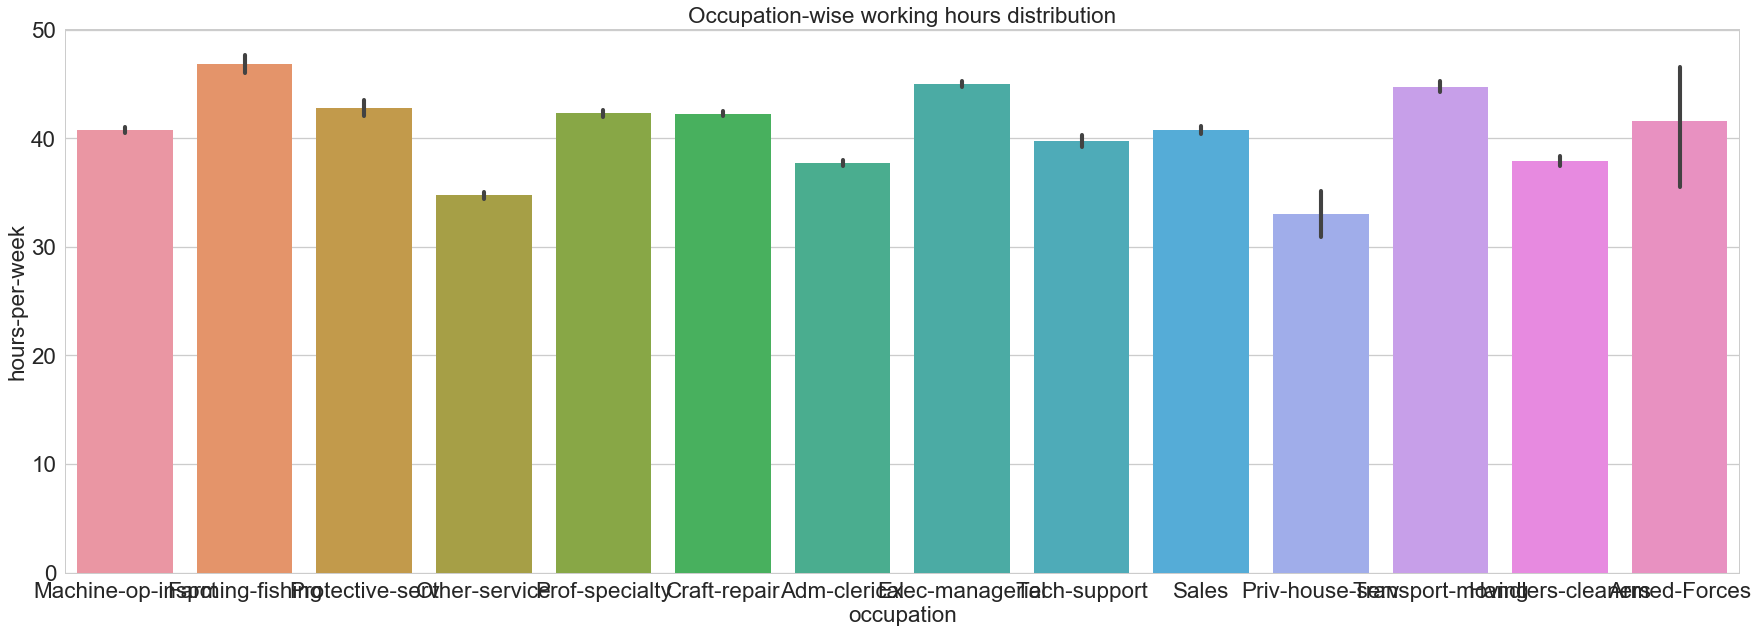

In [11]:
## Month-wise ridership distribution 
## seaborn’s barplot()
fig,ax = plt.subplots()
sn.barplot(data=dfuu[['occupation',
                    'hours-per-week']],
           x="occupation",y="hours-per-week")
ax.set(title="Occupation-wise working hours distribution")

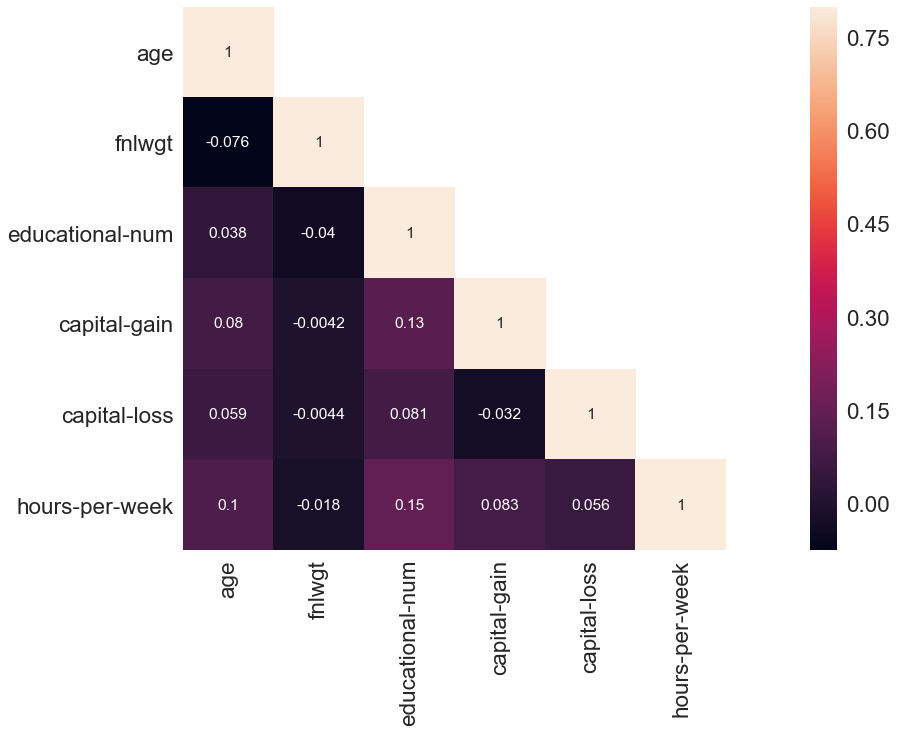

In [12]:
## Correlation matrix between the attributes - correlational matrix (heat map)
corrMatt = dfuu[["age","fnlwgt",
               "educational-num","capital-gain",
               "capital-loss","hours-per-week", 
               ]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [13]:
#Seperate income <=50K and >50K
sdf = dfuu[dfuu.income == '<=50K']
ldf = dfuu[dfuu.income == '>50K']

In [14]:
#hours-per-week study
print('mean working hours-per-week for class income<=50K',sdf['hours-per-week'].mean())
print('mean working hours-per-week for class income>50K',ldf['hours-per-week'].mean())
#age study
print('mean age for class income<=50K',sdf['age'].mean())
print('mean age for class income>50K',ldf['age'].mean())
#educational level study
print('mean eduational level for class income<=50K',sdf['educational-num'].mean())
print('mean eduational level for class income>50K',ldf['educational-num'].mean())

mean working hours-per-week for class income<=50K 39.38354858282049
mean working hours-per-week for class income>50K 45.69024689196288
mean age for class income<=50K 36.756320245008816
mean age for class income>50K 44.011819296095254
mean eduational level for class income<=50K 9.639478778423046
mean eduational level for class income>50K 11.612064437051304


Transport-moving     1874
Tech-support         1026
Prof-specialty       3388
Priv-house-serv       239
Sales                4029
Armed-Forces           10
Machine-op-inspct    2650
Farming-fishing      1317
Handlers-cleaners    1934
Exec-managerial      3178
Adm-clerical         4843
Other-service        4719
Craft-repair         4729
Protective-serv       675
dtype: int64


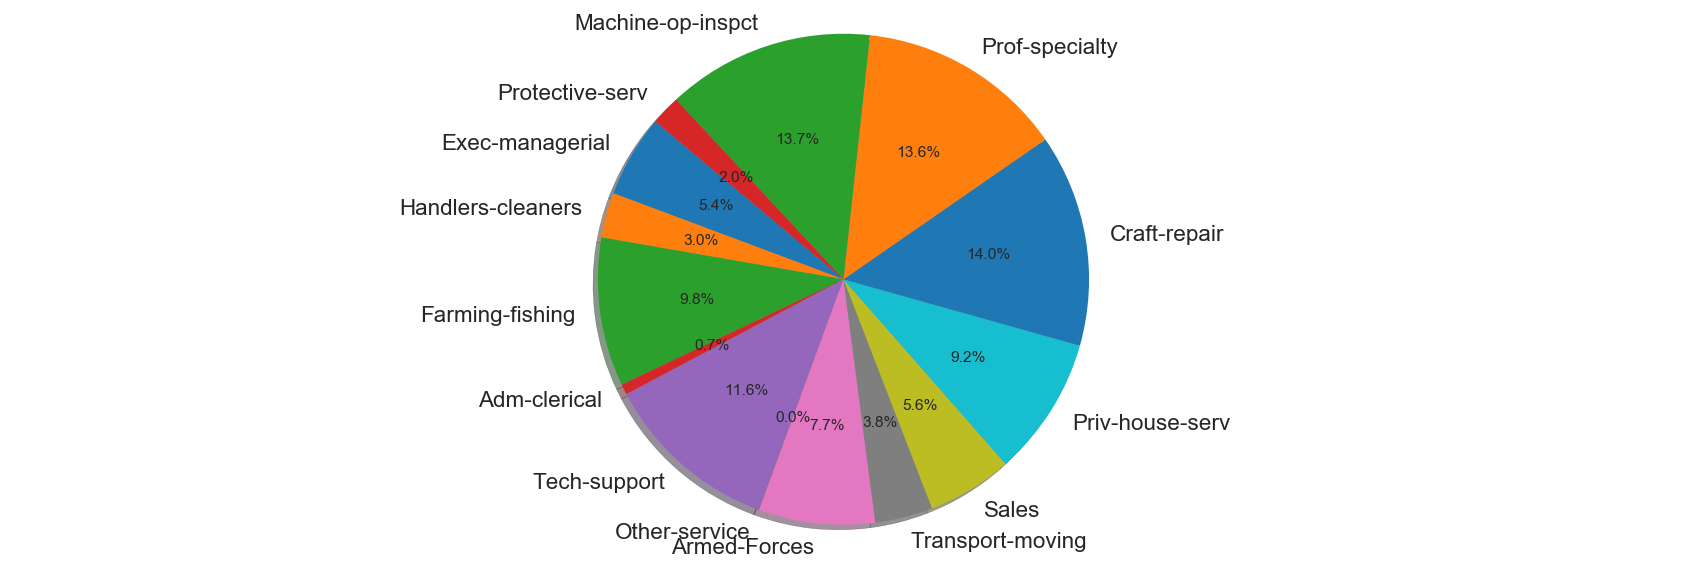

Transport-moving      481
Adm-clerical          768
Tech-support          420
Prof-specialty       2784
Other-service         204
Priv-house-serv         3
Craft-repair         1383
Sales                1475
Armed-Forces            5
Machine-op-inspct     372
Protective-serv       308
Farming-fishing       173
Handlers-cleaners     138
Exec-managerial      2908
dtype: int64


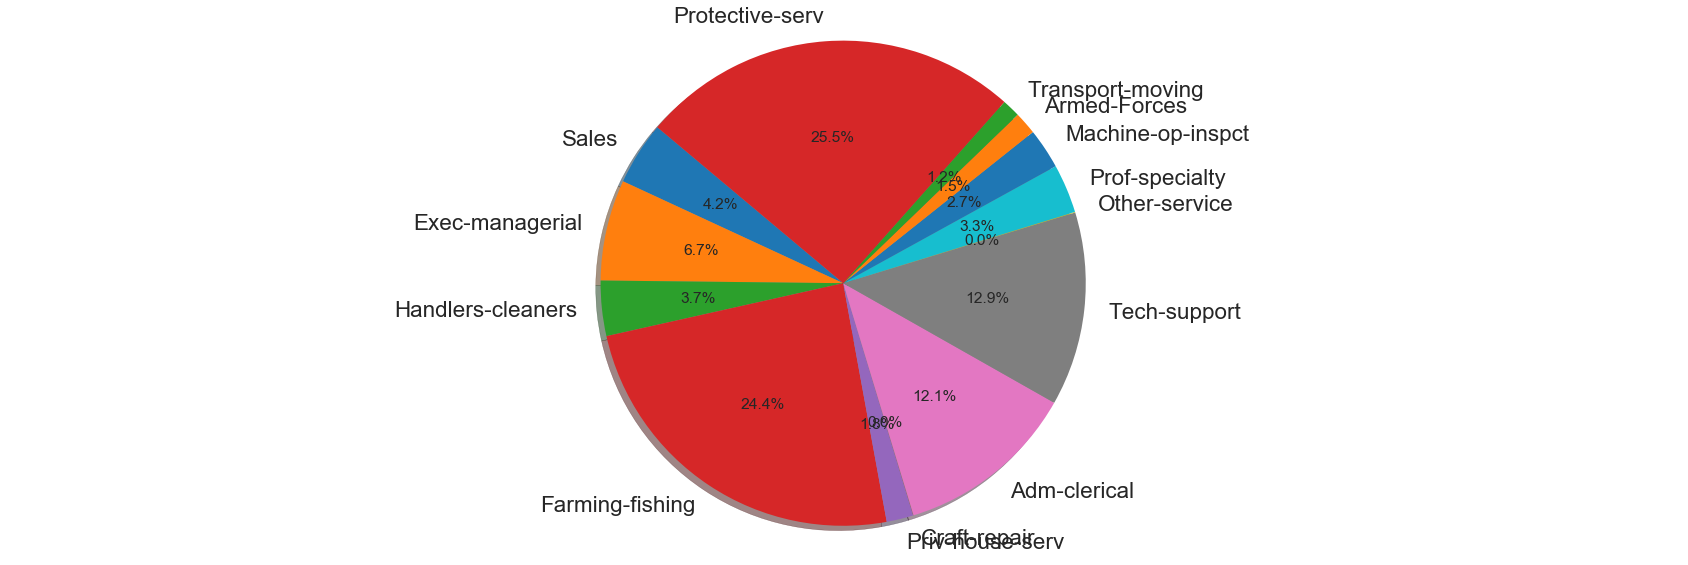

In [15]:
#Occupation study between different income groups
#<=50K occupation distribution
ms=[]
for each in pd.value_counts(sdf['occupation'].values, sort=False):
    ms.append(each)
print(pd.value_counts(sdf['occupation'].values, sort=False))
# Data to plot
labels = 'Exec-managerial', 'Handlers-cleaners', 'Farming-fishing', 'Adm-clerical','Tech-support','Other-service','Armed-Forces','Transport-moving','Sales','Priv-house-serv','Craft-repair','Prof-specialty','Machine-op-inspct','Protective-serv'
sizes = ms
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

#>50K occupation distribution
jpm=[]
for each in pd.value_counts(ldf['occupation'].values, sort=False):
    jpm.append(each)
print(pd.value_counts(ldf['occupation'].values, sort=False))
# Data to plot
labels = 'Sales','Exec-managerial', 'Handlers-cleaners', 'Farming-fishing','Priv-house-serv','Craft-repair', 'Adm-clerical','Tech-support','Other-service','Prof-specialty','Machine-op-inspct','Armed-Forces','Transport-moving','Protective-serv'
sizes = jpm
colors = sn.color_palette(None, len(jpm))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()



Female    13225
Male      21386
dtype: int64


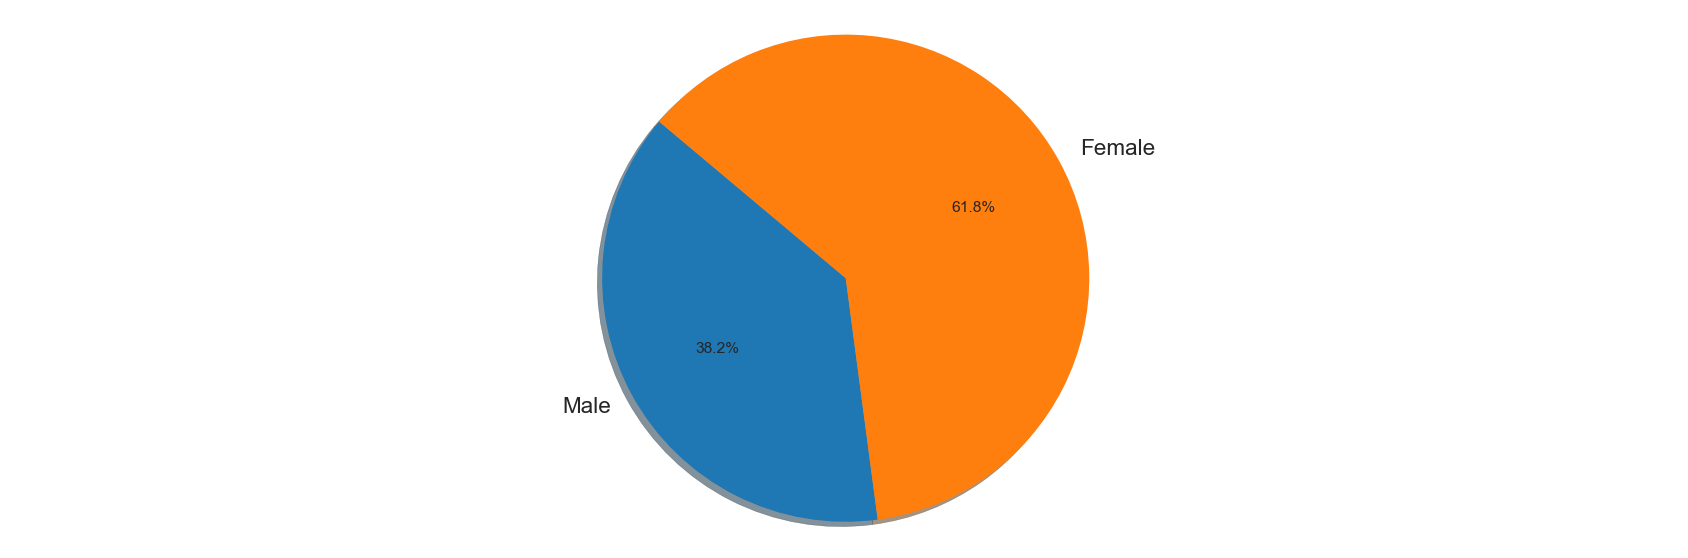

Female    1694
Male      9728
dtype: int64


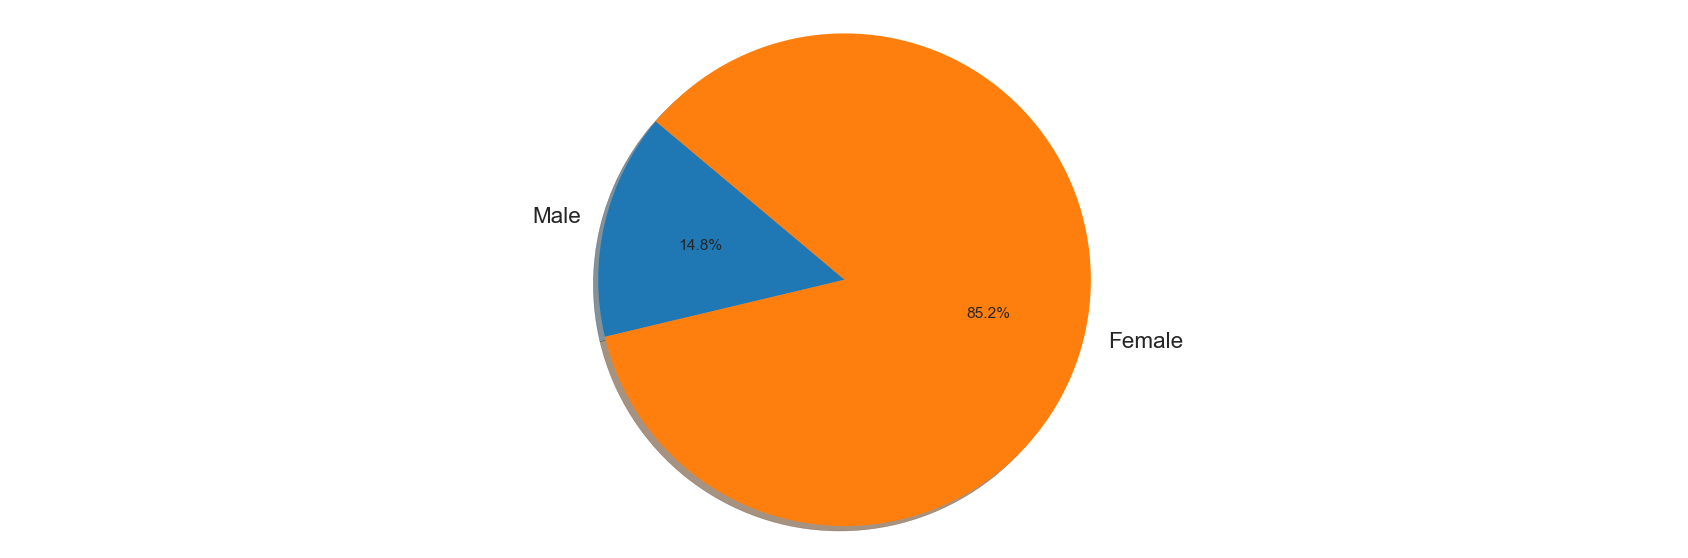

In [16]:
#Gender study between different income groups
#<=50K gender distribution
ubs=[]
for each in pd.value_counts(sdf['gender'].values, sort=False):
    ubs.append(each)
print(pd.value_counts(sdf['gender'].values, sort=False))
# Data to plot
labels = 'Male', 'Female'
sizes = ubs
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

#>50K gender distribution
ubs=[]
for each in pd.value_counts(ldf['gender'].values, sort=False):
    ubs.append(each)
print(pd.value_counts(ldf['gender'].values, sort=False))
# Data to plot
labels = 'Male','Female'
sizes = ubs
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [17]:
pd.value_counts(dfuu['gender'].values, sort=False)

Female    14919
Male      31114
dtype: int64

In [18]:
#Further education level study
#<=50K education level
print('<=50K:')
print(pd.value_counts(sdf['education'].values, sort=True))
print('\n')
#>50K education level
print('>50K:')
print(pd.value_counts(ldf['education'].values, sort=True))

<=50K:
HS-grad         12535
Some-college     8023
Bachelors        4519
11th             1541
Assoc-voc        1469
Masters          1160
10th             1156
Assoc-acdm       1125
7th-8th           786
9th               647
12th              553
5th-6th           443
1st-4th           221
Prof-school       204
Doctorate         157
Preschool          72
dtype: int64


>50K:
Bachelors       3253
HS-grad         2437
Some-college    2013
Masters         1430
Prof-school      606
Assoc-voc        509
Doctorate        419
Assoc-acdm       404
11th              90
10th              83
7th-8th           58
12th              46
9th               40
5th-6th           25
1st-4th            8
Preschool          1
dtype: int64


Asian-Pac-Islander     1020
White                 29077
Black                  3804
Amer-Indian-Eskimo      382
Other                   328
dtype: int64


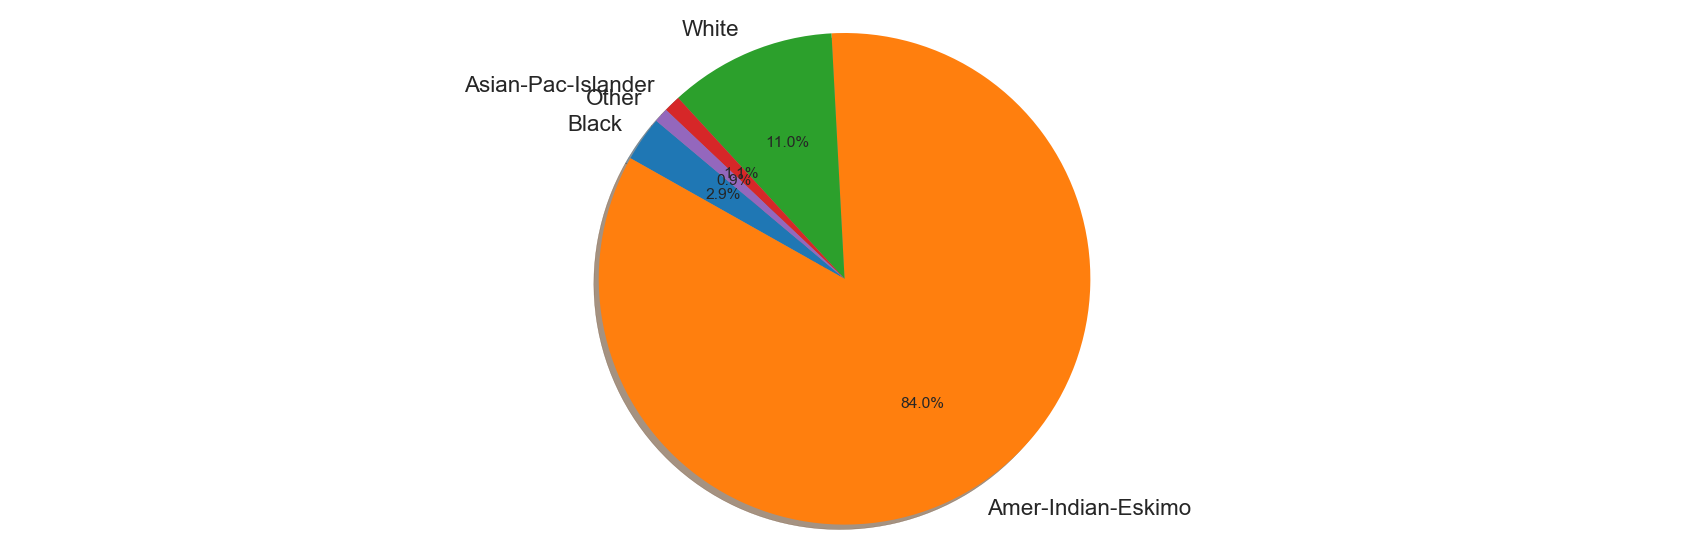

Asian-Pac-Islander      403
White                 10367
Amer-Indian-Eskimo       53
Other                    47
Black                   552
dtype: int64


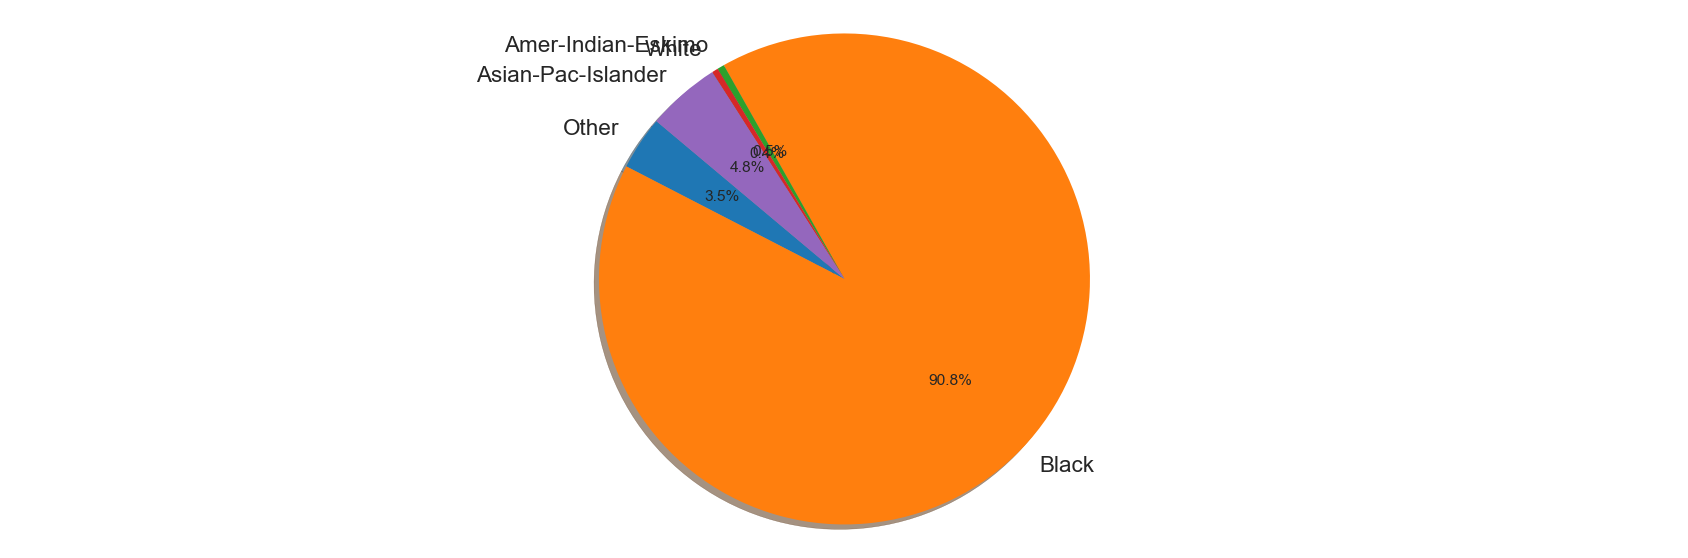

In [19]:
#Race study between different income groups
#<=50K race distribution
ubs=[]
for each in pd.value_counts(sdf['race'].values, sort=False):
    ubs.append(each)
print(pd.value_counts(sdf['race'].values, sort=False))
# Data to plot
labels = 'Black', 'Amer-Indian-Eskimo','White','Asian-Pac-Islander','Other'
sizes = ubs
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
#>50K race distribution
ubs=[]
for each in pd.value_counts(ldf['race'].values, sort=False):
    ubs.append(each)
print(pd.value_counts(ldf['race'].values, sort=False))
# Data to plot
labels = 'Other','Black', 'Amer-Indian-Eskimo','White','Asian-Pac-Islander'
sizes = ubs
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Husband           10336
Other-relative     1349
Not-in-family     10663
Unmarried          4561
Wife               1104
Own-child          6598
dtype: int64


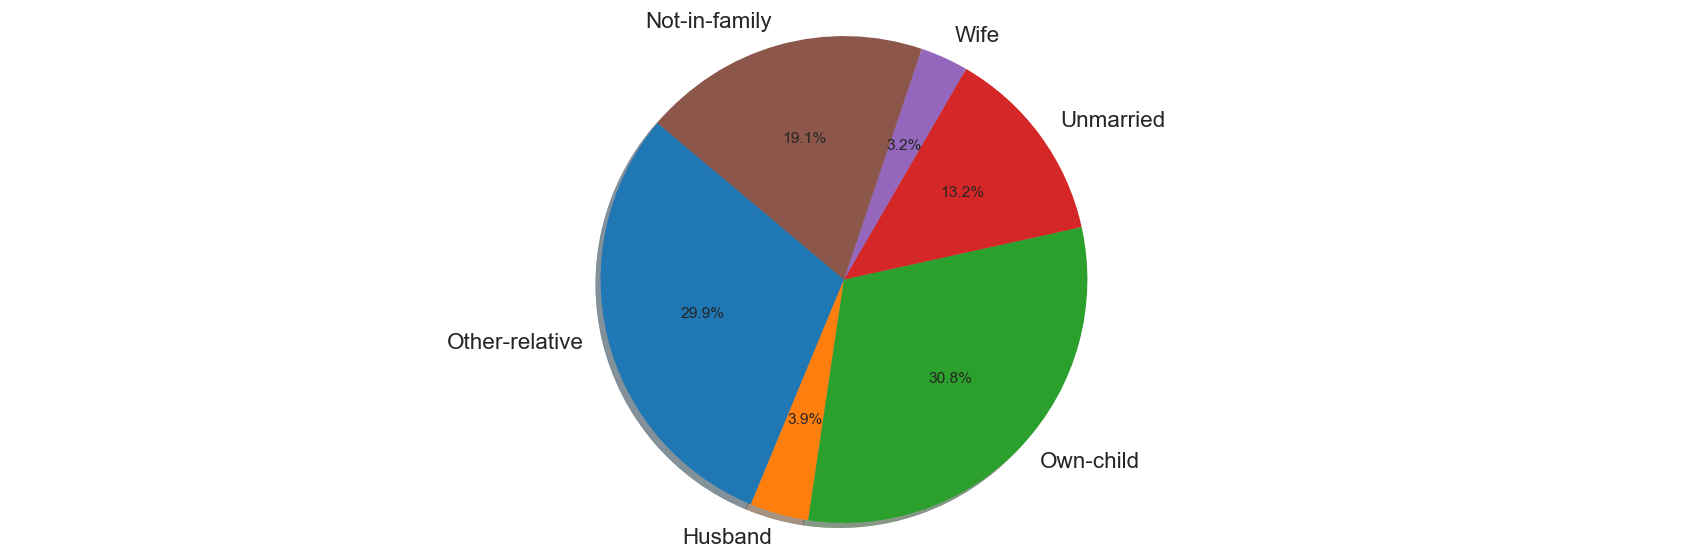

Unmarried          306
Wife              1035
Husband           8669
Own-child          108
Other-relative      51
Not-in-family     1253
dtype: int64


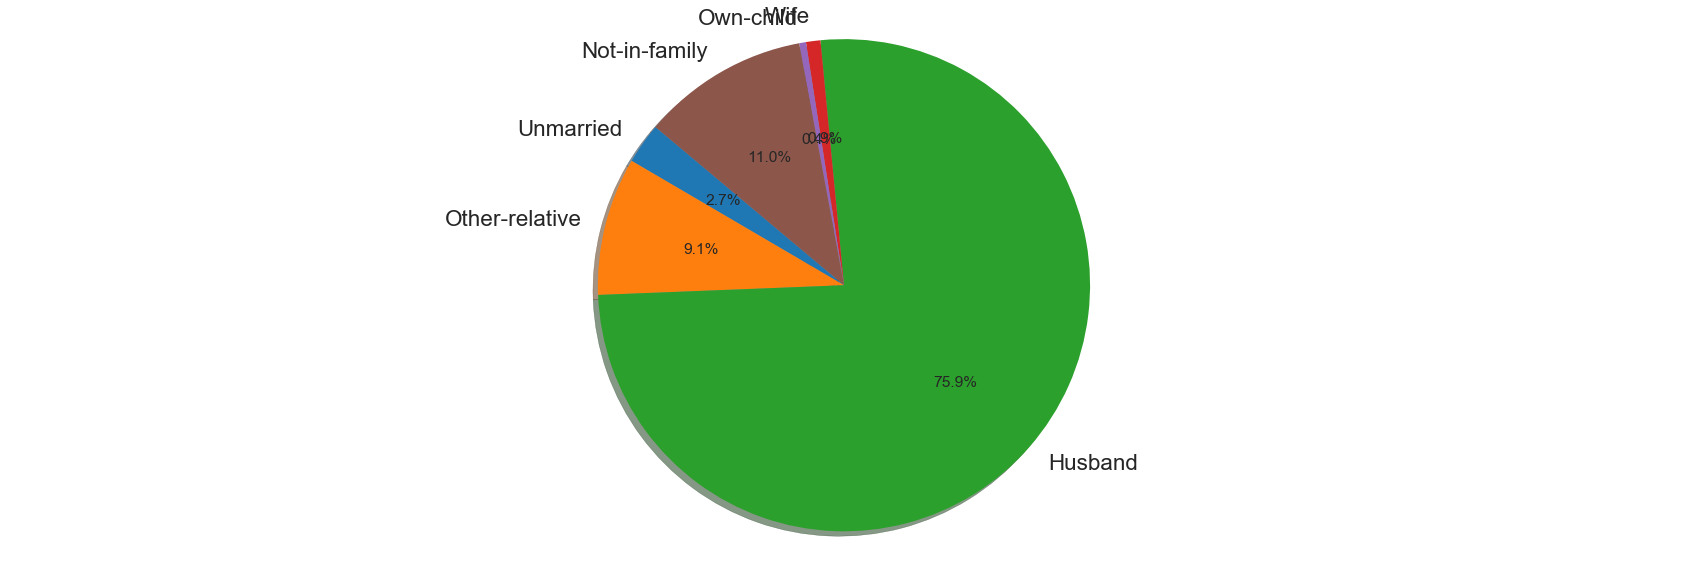

In [20]:
#Family status study between different income groups 
#<=50K family status distribution
ubs=[]
for each in pd.value_counts(sdf['relationship'].values, sort=False):
    ubs.append(each)
print(pd.value_counts(sdf['relationship'].values, sort=False))
# Data to plot
labels = 'Other-relative', 'Husband','Own-child','Unmarried','Wife','Not-in-family'
sizes = ubs
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

#>50K family status distribution
ubs=[]
for each in pd.value_counts(ldf['relationship'].values, sort=False):
    ubs.append(each)
print(pd.value_counts(ldf['relationship'].values, sort=False))
# Data to plot
labels = 'Unmarried','Other-relative', 'Husband','Wife','Own-child','Not-in-family'
sizes = ubs
colors = sn.color_palette(None, len(ms))
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [21]:
#Study on native country interviewees belongs to
#<=50K native-country distribution
print(pd.value_counts(sdf['native-country'].values, sort=True))
print('\n')
#>50K native-country distribution
print(pd.value_counts(ldf['native-country'].values, sort=True))

United-States                 31441
Mexico                          856
Philippines                     199
Puerto-Rico                     155
El-Salvador                     136
Germany                         135
Canada                          103
Cuba                             99
Dominican-Republic               92
Jamaica                          89
India                            85
South                            83
Guatemala                        83
Columbia                         78
China                            77
Vietnam                          76
England                          72
Italy                            67
Poland                           65
Haiti                            60
Japan                            58
Portugal                         50
Nicaragua                        45
Peru                             41
Ecuador                          37
Iran                             34
Greece                           31
Taiwan                      

# Seperating Training Dataset and Testing Dataset

In [22]:
#Seperate independent and dependent variables
y = dfuu['income']
x = dfuu.drop(columns=['income'])

In [23]:
#change categorical variables into numerical variables
cat_feat = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
num_feat = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
xx = pd.DataFrame()
for eachc in num_feat:
    db = []
    for eachr in x[eachc]:
        db.append((eachr-x[eachc].min())/(x[eachc].max()-x[eachc].min()))
    xx[eachc] = db
gen_dummy_features = pd.get_dummies(x[cat_feat], drop_first=True)
x2 = pd.concat([xx[num_feat],gen_dummy_features], axis=1)
print(x2.head())

        age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  0.109589  0.144430         0.400000      0.000000           0.0   
1  0.287671  0.051677         0.533333      0.000000           0.0   
2  0.150685  0.219011         0.733333      0.000000           0.0   
3  0.369863  0.099418         0.600000      0.076881           0.0   
4  0.232877  0.125398         0.333333      0.000000           0.0   

   hours-per-week  workclass_Local-gov  workclass_Private  \
0        0.397959                    0                  1   
1        0.500000                    0                  1   
2        0.397959                    1                  0   
3        0.397959                    0                  1   
4        0.295918                    0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                       0                           0   
1                       0                           0   
2                       0                

In [24]:
yy = y.replace('>50K',1)
y2 = yy.replace('<=50K',0)
print("Shape::{}".format(x.shape))
print("Shape::{}".format(x2.shape))

Shape::(46033, 14)
Shape::(46033, 96)


In [25]:
x2['income'] = y2
#Seperate income <=50K and >50K
sdf2 = x2[x2.income == 0]
ldf2 = x2[x2.income == 1]
sy = sdf2['income']
sx = sdf2.drop(columns=['income'])
sX_train, sX_test, sy_train, sy_test = train_test_split(sx, sy, test_size=0.4)
ly = ldf2['income']
lx = ldf2.drop(columns=['income'])
lX_train, lX_test, ly_train, ly_test = train_test_split(lx, ly, test_size=0.4)
#Train and test dataset seperation
X_trainf = [sX_train,lX_train]
X_train = pd.concat(X_trainf)
X_testf = [sX_test,lX_test]
X_test = pd.concat(X_testf)
y_trainf = [sy_train,ly_train]
y_train = pd.concat(y_trainf)
y_testf = [sy_test,ly_test]
y_test = pd.concat(y_testf)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(27619, 96) (27619,)
(18414, 96) (18414,)


# KNN

In [26]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

k_scores=pd.DataFrame(k_scores,index=k_range)
print (k_scores)

           0
1   0.788008
2   0.803287
3   0.812520
4   0.815670
5   0.817806
6   0.818566
7   0.821137
8   0.823418
9   0.824359
10  0.824686
11  0.826170
12  0.825337
13  0.827002
14  0.826387
15  0.826604
16  0.826568
17  0.826930
18  0.826894
19  0.827618
20  0.827908
21  0.827546
22  0.827546
23  0.827401
24  0.828451
25  0.827872
26  0.828234
27  0.828161
28  0.828017
29  0.828017
30  0.828234


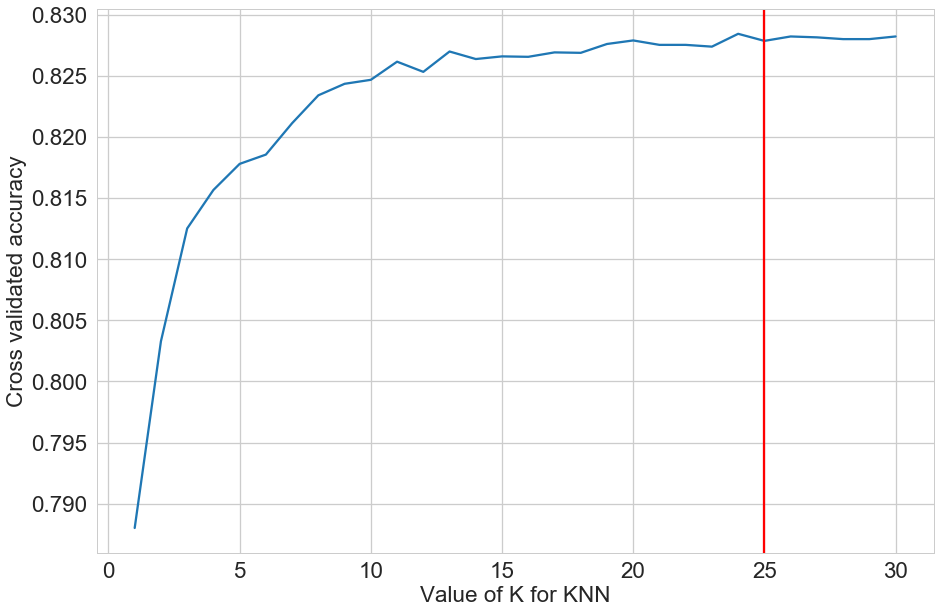

In [29]:
## plot for choosing k
plt.figure(figsize=(15,10))
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross validated accuracy")
plt.axvline(x=25, c='r')
## hence, choose k=25

In [56]:
# Instantiate KNN learning model(k=25)
knn = KNeighborsClassifier(n_neighbors=25)

# fit the model
knn.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
accuracy_test = accuracy_score(y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.84
Test_data Accuracy: 0.83


# Logistic Regression

In [31]:
model = LogisticRegression(C = 1e9)
model = model.fit (X_train,y_train)

In [32]:
param = pd.DataFrame()
param['var']=X_train.columns
param['coef']=np.transpose(model.coef_)
print (param)

                                          var       coef
0                                         age   1.918874
1                                      fnlwgt   1.053705
2                             educational-num   1.892145
3                                capital-gain  30.847113
4                                capital-loss   3.076249
5                              hours-per-week   2.842912
6                         workclass_Local-gov  -0.671495
7                           workclass_Private  -0.443352
8                      workclass_Self-emp-inc  -0.317023
9                  workclass_Self-emp-not-inc  -1.005917
10                        workclass_State-gov  -0.842873
11                      workclass_Without-pay  -4.937418
12                             education_11th  -0.096156
13                             education_12th   0.218787
14                          education_1st-4th  -0.284638
15                          education_5th-6th   0.012005
16                          edu

In [35]:
## Instantiate The Logistic Regression
sm_model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
sm_model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                27619
Model:                          Logit   Df Residuals:                    27523
Method:                           MLE   Df Model:                           95
Date:                Tue, 20 Nov 2018   Pseudo R-squ.:                  0.4185
Time:                        20:19:31   Log-Likelihood:                -8997.9
converged:                      False   LL-Null:                       -15474.
                                        LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -7.0631        nan        nan        nan         nan         nan
age                                           1.9188      0.130     14.709      0.000       1.663       2.175
fnlwgt                                        1.0529      0.269      3.921      0.000       0.527       1.579
educational-num                               1.8952        nan        nan        nan         nan         nan
capital-gain                                 30.8408      1.123     27.453      0.000      28.639      33.043
capital-loss                                  3.0766      0.174     17.653      0.000       2.735       3.418
hours-per-week                                2.8426      0.172     16.551      0.000       2.506       3.179
workclass_Local-gov                          -0.6715      0.117     -5.717      0.000      -0.902      -0.441
workclass_Private                            -0.4433      0.097     -4.551      0.000      -0.634      -0.252
workclass_Self-emp-inc                       -0.3169      0.129     -2.463      0.014      -0.569      -0.065
workclass_Self-emp-not-inc                   -1.0058      0.115     -8.748      0.000      -1.231      -0.780
workclass_State-gov                          -0.8429      0.129     -6.547      0.000      -1.095      -0.591
workclass_Without-pay                       -57.9453    1.7e+12   -3.4e-11      1.000   -3.34e+12    3.34e+12
education_11th                               -0.0954        nan        nan        nan         nan         nan
education_12th                                0.2180        nan        nan        nan         nan         nan
education_1st-4th                            -0.2841        nan        nan        nan         nan         nan
education_5th-6th                             0.0108        nan        nan        nan         nan         nan
education_7th-8th                            -0.2400        nan        nan        nan         nan         nan
education_9th                                 0.1201        nan        nan        nan         nan         nan
education_Assoc-acdm                          0.6480        nan        nan        nan         nan         nan
education_Assoc-voc                           0.6865        nan        nan        nan         nan         nan
education_Bachelors                           1.0417        nan        nan        nan         nan         nan
education_Doctorate                           1.4297        nan        nan        nan         nan         nan
education_HS-grad                             0.4707        nan        nan        nan         nan         nan
education_Masters                             1.2686        nan        nan        nan         nan         nan
education_Preschool                          -0.7160        nan        nan        nan         nan         nan
education_Prof-school                         1.684

In [37]:
# testing for satuated model and fitted model
1 - stats.chi2.cdf(-2*sm_model.llf, y_train.shape[0]-9-1)

1.0

In [38]:
# For each Xi, calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.7,age
1,1.1,fnlwgt
2,7287.1,educational-num
3,1.1,capital-gain
4,1.0,capital-loss
5,1.2,hours-per-week
6,3.1,workclass_Local-gov
7,6.7,workclass_Private
8,2.2,workclass_Self-emp-inc
9,3.5,workclass_Self-emp-not-inc


In [39]:
def vifcl(df):
    a = 0
    i = 0
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    t = vif["VIF Factor"].max()
    for each in vif["VIF Factor"]:
        if each == t and each >= 10:
            a = i
        i += 1
    vax = vif["VIF Factor"].loc[a]
    print(vif.loc[a],"\n>10")
    return a,vax

In [40]:
#drop VIF>10
dropcindex=[]
while True:
    vmax = 0
    dropt = False
    k,s = vifcl(X_train)
    print(s)
    if s >= 10:
        dropt = True
    if dropt == True:
        print("dropped",X_train.columns.get_values()[k])
        X_train = X_train.drop([X_train.columns.get_values()[k]],axis=1)
        vif = vif.drop([k])
        X_train = X_train.reset_index(drop=True)
        vif = vif.reset_index(drop=True)
        dropcindex.append(k)
    else:
        break

VIF Factor            7287.11
features      educational-num
Name: 2, dtype: object 
>10
7287.112415393702
dropped educational-num
VIF Factor                         267.788
features      native-country_United-States
Name: 92, dtype: object 
>10
267.78818181573644
dropped native-country_United-States
VIF Factor       65.8112
features      race_White
Name: 53, dtype: object 
>10
65.81118113981753
dropped race_White
VIF Factor                               31.127
features      marital-status_Married-civ-spouse
Name: 27, dtype: object 
>10
31.127034797923994
dropped marital-status_Married-civ-spouse
VIF Factor              18.6169
features      workclass_Private
Name: 6, dtype: object 
>10
18.616897531220612
dropped workclass_Private
VIF Factor            12.598
features      hours-per-week
Name: 4, dtype: object 
>10
12.597958293949342
dropped hours-per-week
VIF Factor    5.46065
features          age
Name: 0, dtype: object 
>10
5.460650127008997


In [41]:
X_train

,age,fnlwgt,capital-gain,capital-loss,workclass_Local-gov,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_Vietnam,native-country_Yugoslavia
0,0.041096,0.087731,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.424658,0.216257,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.506849,0.085215,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.095890,0.026092,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.438356,0.102932,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.424658,0.076133,0.000000,0.383150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.150685,0.017534,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.465753,0.109863,0.000000,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000000,0.123075,0.000000,0.000000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0.287671,0.078278,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#fit the cleansed data again
model = LogisticRegression(C = 1e9)
model = model.fit (X_train,y_train)

In [43]:
## Examine The Coefficients
coef = np.transpose(model.coef_)
## np.transpose() create the transpose of a matrix
coef = pd.DataFrame(coef,index=X_train.columns,columns = ['coef'])
print (coef.head())

                          coef
age                   1.566528
fnlwgt                0.965348
capital-gain         30.967911
capital-loss          3.099041
workclass_Local-gov  -0.261166


In [44]:
## Instantiate The Logistic Regression
sm_model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
sm_model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                27619
Model:                          Logit   Df Residuals:                    27528
Method:                           MLE   Df Model:                           90
Date:                Tue, 20 Nov 2018   Pseudo R-squ.:                  0.4061
Time:                        20:29:19   Log-Likelihood:                -9190.1
converged:                      False   LL-Null:                       -15474.
                                        LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -3.2334      0.207    -15.640      0.000      -3.639      -2.828
age                                           1.5667      0.126     12.414      0.000       1.319       1.814
fnlwgt                                        0.9657      0.265      3.646      0.000       0.447       1.485
capital-gain                                 30.9608      1.124     27.557      0.000      28.759      33.163
capital-loss                                  3.0991      0.173     17.929      0.000       2.760       3.438
workclass_Local-gov                          -0.2611      0.076     -3.453      0.001      -0.409      -0.113
workclass_Self-emp-inc                        0.2707      0.088      3.064      0.002       0.098       0.444
workclass_Self-emp-not-inc                   -0.5186      0.067     -7.701      0.000      -0.651      -0.387
workclass_State-gov                          -0.4664      0.092     -5.064      0.000      -0.647      -0.286
workclass_Without-pay                       -21.5147   2.32e+04     -0.001      0.999   -4.55e+04    4.55e+04
education_11th                                0.0119      0.231      0.052      0.959      -0.441       0.465
education_12th                                0.4846      0.285      1.699      0.089      -0.074       1.044
education_1st-4th                            -0.7841      0.591     -1.326      0.185      -1.943       0.375
education_5th-6th                            -0.3709      0.342     -1.085      0.278      -1.041       0.299
education_7th-8th                            -0.4688      0.255     -1.838      0.066      -0.969       0.031
education_9th                                -0.0266      0.277     -0.096      0.923      -0.569       0.515
education_Assoc-acdm                          1.4371      0.193      7.431      0.000       1.058       1.816
education_Assoc-voc                           1.3279      0.186      7.127      0.000       0.963       1.693
education_Bachelors                           1.9560      0.174     11.233      0.000       1.615       2.297
education_Doctorate                           2.8527      0.231     12.344      0.000       2.400       3.306
education_HS-grad                             0.8678      0.170      5.106      0.000       0.535       1.201
education_Masters                             2.3307      0.184     12.645      0.000       1.969       2.692
education_Preschool                          -1.2137      1.151     -1.054      0.292      -3.470       1.042
education_Prof-school                         2.9647      0.221     13.389      0.000       2.531       3.399
education_Some-college                        1.2116      0.172      7.034      0.000       0.874       1.549
marital-status_Married-AF-spouse              0.0316      0.566      0.056      0.955      -1.077       1.140
marital-status_Married-spouse-absent          0.123

In [45]:
## Calculate Class Probabilities
for c in [2,92,53,27,6,4]:
    X_test = X_test.drop([X_test.columns.get_values()[c]],axis=1)
X_test.shape

(18414, 90)

In [46]:
probability = model.predict_proba(X_test)
print (probability)

[[0.84946751 0.15053249]
 [0.98711285 0.01288715]
 [0.98626353 0.01373647]
 ...
 [0.27009286 0.72990714]
 [0.65308358 0.34691642]
 [0.41583867 0.58416133]]


In [50]:
# testing for satuated model and fitted model
1 - stats.chi2.cdf(-2*sm_model.llf, y_train.shape[0]-9-1)

1.0

### cutoff point 0.5

In [52]:
## Predict Class Labels
predicted = model.predict(X_train)

In [53]:
## Evaluate The Model Confusion Matrix
print (metrics.confusion_matrix(y_train, predicted))
## Classification Report
print (metrics.classification_report(y_train, predicted))
## Model Accuracy
print (model.score(X_train,y_train))

[[19313  1453]
 [ 2764  4089]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90     20766
          1       0.74      0.60      0.66      6853

avg / total       0.84      0.85      0.84     27619

0.8473152539918172


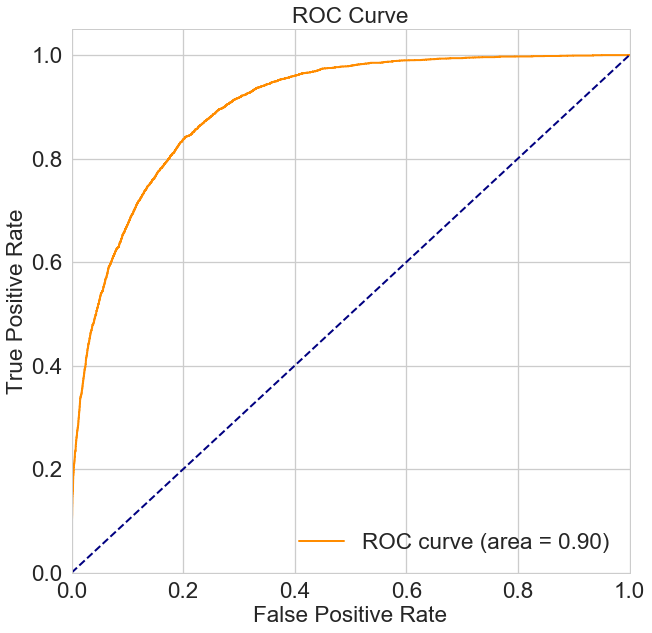

In [49]:
## Prediction Performance – ROC curve & AUC
y_predict_probabilities = probability[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()